### Suppose that I fit a logistic regression model using historical data collected from students
$$\ln\left(\frac{p}{1-p}\right) = -3 + 0.8 \times \text{Hours_Studied} + 1.5 \times \text{Review_Session}$$


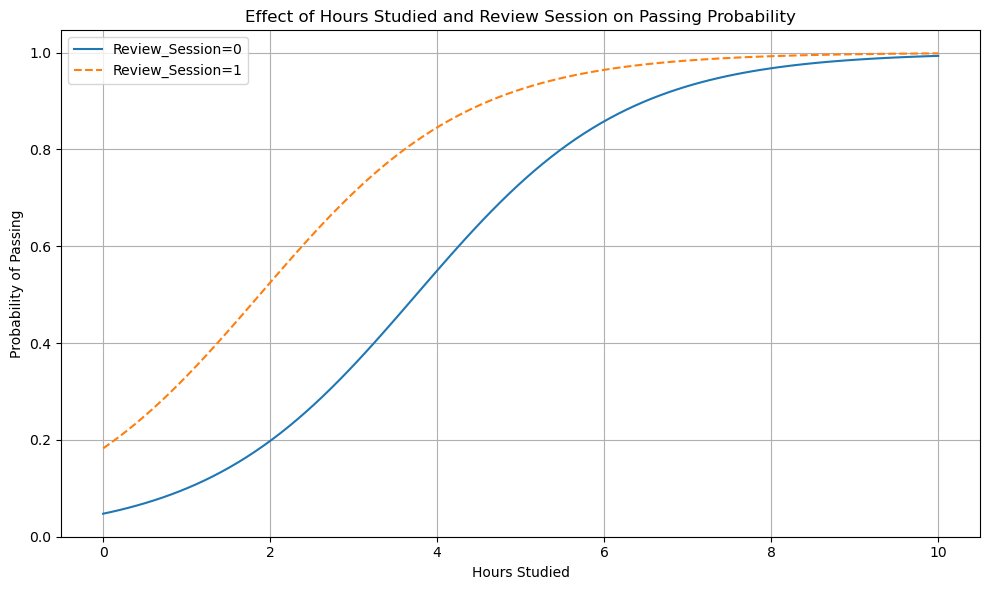

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function
def logistic_function(z):
    return 1 / (1 + np.exp(-z))

# Define the model
def log_odds(hours_studied, review_session):
    return -3 + 0.8 * hours_studied + 1.5 * review_session

# Generate some data
hours_studied = np.linspace(0, 10, 100)

# Calculate log-odds and probabilities for both Review_Session=0 and Review_Session=1
log_odds_0 = log_odds(hours_studied, 0)
probability_0 = logistic_function(log_odds_0)

log_odds_1 = log_odds(hours_studied, 1)
probability_1 = logistic_function(log_odds_1)

# Plot the data
plt.figure(figsize=(10,6))

plt.plot(hours_studied, probability_0, label='Review_Session=0')
plt.plot(hours_studied, probability_1, label='Review_Session=1', linestyle='--')

plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Effect of Hours Studied and Review Session on Passing Probability')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
# Thomas's situation
hours_studied_thomas = 2
review_session_thomas = 0

log_odds_thomas = log_odds(hours_studied_thomas, review_session_thomas)



odds_thomas = np.exp(log_odds_thomas)
probability_thomas = logistic_function(log_odds_thomas)


In [4]:
print("1. Log Odds:", log_odds_thomas)
print("2. Odds:", odds_thomas)
print("3. Likelihood of Passing:", probability_thomas)


1. Log Odds: -1.4
2. Odds: 0.2465969639416065
3. Likelihood of Passing: 0.19781611144141825


In [5]:
# Thomas's original situation
hours_studied_thomas = 2
review_session_thomas_original = 0

# Calculate the original log odds
log_odds_thomas_original = log_odds(hours_studied_thomas, review_session_thomas_original)

# Calculate the original odds
odds_thomas_original = np.exp(log_odds_thomas_original)

# Calculate the original likelihood of passing
probability_thomas_original = logistic_function(log_odds_thomas_original)

# Thomas's updated situation with a review session
review_session_thomas_updated = 1

# Calculate the updated log odds
log_odds_thomas_updated = log_odds(hours_studied_thomas, review_session_thomas_updated)

# Calculate the updated odds
odds_thomas_updated = np.exp(log_odds_thomas_updated)

# Calculate the updated likelihood of passing
probability_thomas_updated = logistic_function(log_odds_thomas_updated)

# Print the results
print("Original Log Odds:", log_odds_thomas_original)
print("Original Odds:", odds_thomas_original)
print("Original Likelihood of Passing:", probability_thomas_original)

print("Updated Log Odds:", log_odds_thomas_updated)
print("Updated Odds:", odds_thomas_updated)
print("Updated Likelihood of Passing:", probability_thomas_updated)


Original Log Odds: -1.4
Original Odds: 0.2465969639416065
Original Likelihood of Passing: 0.19781611144141825
Updated Log Odds: 0.10000000000000009
Updated Odds: 1.1051709180756477
Updated Likelihood of Passing: 0.52497918747894


In [6]:
# Define a different number of hours studied (e.g., 3 hours)
hours_studied_thomas_updated = 3

# Calculate the updated log odds with the new hours studied
log_odds_thomas_updated = log_odds(hours_studied_thomas_updated, review_session_thomas_updated)

# Calculate the updated odds
odds_thomas_updated = np.exp(log_odds_thomas_updated)

# Calculate the updated likelihood of passing
probability_thomas_updated = logistic_function(log_odds_thomas_updated)

# Print the results for the updated hours studied
print("Updated Hours Studied:", hours_studied_thomas_updated)
print("Updated Log Odds:", log_odds_thomas_updated)
print("Updated Odds:", odds_thomas_updated)
print("Updated Likelihood of Passing:", probability_thomas_updated)


Updated Hours Studied: 3
Updated Log Odds: 0.9000000000000004
Updated Odds: 2.4596031111569507
Updated Likelihood of Passing: 0.710949502625004


In [7]:
# Situation 1: 8 hours studied, no review session
hours_studied = 8
review_session = 0
log_odds_no_review = log_odds(hours_studied, review_session)




# Situation 2: 8 hours studied, attending a review session
review_session = 1
log_odds_review = log_odds(hours_studied, review_session)

# Calculate the probabilities
probability_no_review = logistic_function(log_odds_no_review)
probability_review = logistic_function(log_odds_review)


In [8]:
print("Probability of Passing without Review Session:", probability_no_review)
print("Probability of Passing with Review Session:", probability_review)

Probability of Passing without Review Session: 0.9677045353015495
Probability of Passing with Review Session: 0.9926084586557181


Task 1b: Build a logistic regression model Using the dataset “student_data.csv,” write code to (1) create a visualization of the data, (2) fit a model using logistic regression, (3) output model coefficients and performance metrics such as accuracy and AUC and ROC; NOTE: For this exercise, you will train and test on the same given dataset, instead of doing train/test split. Make sure you give the correct GPT prompt.

Model Coefficients:
Hours_Studied: 3.0013
Review_Session: 1.0038
Intercept: 2.0159


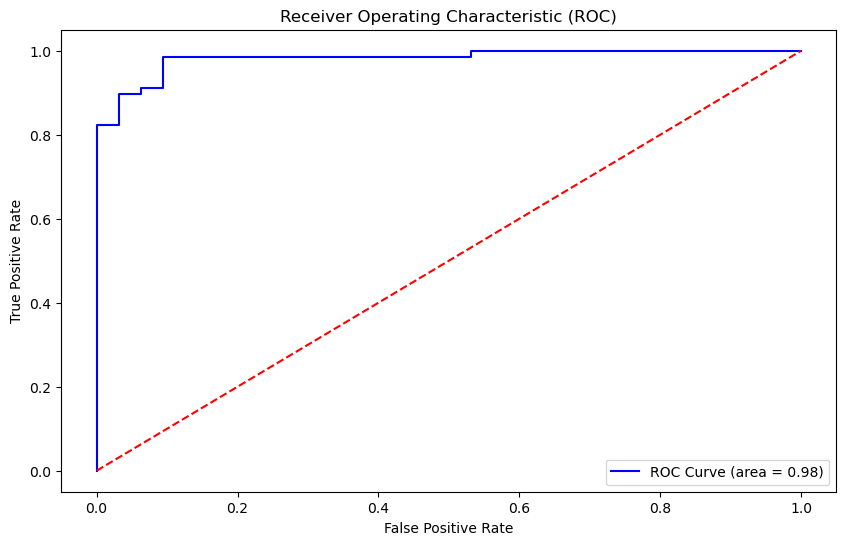

Accuracy: 0.9200
AUC: 0.9821


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('student_data.csv')

# Assuming the target variable is in the column named 'Results'
X = data.drop('Results', axis=1)
y = data['Results']

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create and train a logistic regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X, y)

# Output model coefficients
coefficients = logistic_reg.coef_
intercept = logistic_reg.intercept_

print("Model Coefficients:")
for feature, coef in zip(data.columns[:-1], coefficients[0]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {intercept[0]:.4f}")

# Predict probabilities
y_prob = logistic_reg.predict_proba(X)[:, 1]

# Predict classes
y_pred = logistic_reg.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Calculate AUC and ROC
roc_auc = roc_auc_score(y, y_prob)
fpr, tpr, thresholds = roc_curve(y, y_prob)

# Create a visualization of the data
plt.figure(figsize=(10, 6))

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()

# Show the plot
plt.show()

# Output performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {roc_auc:.4f}")


Task 2: Understanding and Prevent Overfitting in the context of SVM

Write code to fit a Support Vector Machine model using (1) linear kernel and (2) RBF kernel. For the RBF kernel, use grid search to find the best gamma parameter using k-fold cross-validation.

In [6]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('student_data.csv')

# Assuming the target variable is in the column named 'Results'
X = data.drop('Results', axis=1)
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train an SVM model with a linear kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Evaluate the linear SVM
linear_train_accuracy = linear_svm.score(X_train, y_train)
linear_test_accuracy = linear_svm.score(X_test, y_test)

print(f"Linear SVM Train Accuracy: {linear_train_accuracy:.4f}")
print(f"Linear SVM Test Accuracy: {linear_test_accuracy:.4f}")

# Create an SVM model with an RBF kernel and perform grid search for best gamma
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10]}
rbf_svm = SVC(kernel='rbf')
grid_search = GridSearchCV(rbf_svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best gamma parameter
best_gamma = grid_search.best_params_['gamma']

# Create and train an SVM model with an RBF kernel using the best gamma
rbf_svm_best = SVC(kernel='rbf', gamma=best_gamma)
rbf_svm_best.fit(X_train, y_train)

# Evaluate the RBF SVM
rbf_train_accuracy = rbf_svm_best.score(X_train, y_train)
rbf_test_accuracy = rbf_svm_best.score(X_test, y_test)

print(f"RBF SVM Train Accuracy: {rbf_train_accuracy:.4f}")
print(f"RBF SVM Test Accuracy: {rbf_test_accuracy:.4f}")
print(f"Best Gamma for RBF Kernel: {best_gamma}")


Linear SVM Train Accuracy: 0.9250
Linear SVM Test Accuracy: 0.9000
RBF SVM Train Accuracy: 0.9250
RBF SVM Test Accuracy: 0.9000
Best Gamma for RBF Kernel: 1
